<a href="https://colab.research.google.com/github/cutlersimpson/GU-ML/blob/main/Cutler_Simpson_Dimensionality_Reduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dimensionality Reduction
---

In [ ]:
#@markdown Install imports
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 

# Cancer Data
---

In [ ]:
#@markdown Load cancer data

cancer = pd.read_table('https://raw.githubusercontent.com/PineBiotech/omicslogic/master/LIHC_BRCA_data1_marked.txt', header=None)
cancer.head

<bound method NDFrame.head of                      0                                     1   \
0                    Id  TCGA-2V-A95S-01A-11R-A37K-07_LIHC_TP   
1                 class                               LIHC_TP   
2            a100130426                                     0   
3            a100133144                                  2.31   
4            a100134869                                  5.69   
...                 ...                                   ...   
20528          ZYX|7791                                  4869   
20529       ZZEF1|23140                                  1366   
20530        ZZZ3|26009                                   783   
20531  psiTPTE22|387590                                     6   
20532       tAKR|389932                                    10   

                                         2   \
0      TCGA-2Y-A9GS-01A-12R-A38B-07_LIHC_TP   
1                                   LIHC_TP   
2                                         0   
3

In [ ]:
#@markdown Process data for PCA

#set labels
labels_list = cancer.loc[[0]] 

#Make a list of sample names
sample_names = cancer.loc[0] 
sample_names = list(cancer)[1:] 

#Make unique list of labels
labels = np.unique(labels_list) 

#delete "Group" label 
labels = np.delete(labels, np.where(labels == 'Group')) 

#Remove row "Class" at index 1 and index from data
data=cancer.drop([0, 1]) 
data = data.transpose() 
data = data.drop([0])

#Get list of all labels
flabels = labels_list.loc[0,:].values[1:] 

#scale data
from sklearn.preprocessing import StandardScaler 
from sklearn import manifold

scaled = StandardScaler() 
scaled.fit(data) 
scaled_data = scaled.transform(data)

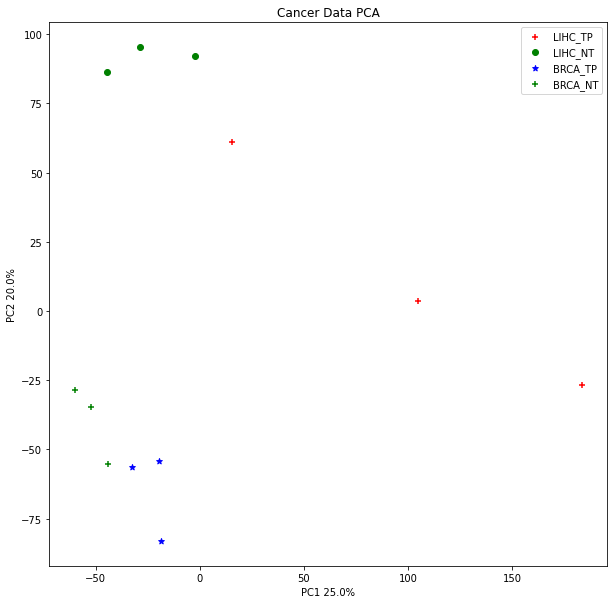

In [ ]:
#@markdown Run Principal Component Analysis
from sklearn.decomposition import PCA 

pca = PCA(n_components=2) 
pca.fit(scaled_data) 
xpca = pca.transform(scaled_data)

PC1 = 0 
PC2 = 1 

plt.figure(figsize=(10, 10))

for i in range(0, xpca.shape[0]): 
  if 'LIHC_TP' in flabels[i]: 
    c1 = plt.scatter(xpca[i,PC1],xpca[i,PC2], c='r', marker='+') 
  elif 'LIHC_NT' in flabels[i]: 
    c2 = plt.scatter(xpca[i,PC1],xpca[i,PC2], c='g', marker='o') 
  elif 'BRCA_TP' in flabels[i]: 
    c3 = plt.scatter(xpca[i,PC1],xpca[i,PC2], c='b', marker='*') 
  elif 'BRCA_NT' in flabels[i]:
    c4 = plt.scatter(xpca[i,PC1],xpca[i,PC2], c='g', marker='+') 

#Add labels to PCA scatterplot:
plt.legend([c1, c2, c3, c4],['LIHC_TP', 'LIHC_NT', 'BRCA_TP', 'BRCA_NT']) 
plt.xlabel(f'PC1 {round(pca.explained_variance_ratio_[0],2)*100}%') 
plt.ylabel(f'PC2 {round(pca.explained_variance_ratio_[1],2)*100}%') 
plt.title('Cancer Data PCA')
plt.show() 

# Results

The PCA plot covers 45% of the variance which is not a significant amount of coverage. The plot does show that the tissue type (LIHC vs BRCA) is a more significant factor differentiating the samples as the BRCA samples, both tumor and non tumor are clustered near each other in the bottom left corner of the plot while the LIHC data is more spread out but closer together when compared to the BRCA samples. 

# Ebola
---

In [ ]:
#@markdown Load ebola data

data = pd.read_table('https://www.dropbox.com/s/8zwxoujgqfla1ac/EBV_PRJNA386278_HZlog_Zaire1995.txt?dl=1', header=None)
data.head

<bound method NDFrame.head of                                                        0                  1  \
0                                        kchain_Pos_Nucl  EBV_LI_SRR5528818   
1      Zaire_ebolavirus_strain_Zaire_1995,_complete_g...                  0   
2      Zaire_ebolavirus_strain_Zaire_1995,_complete_g...                  0   
3      Zaire_ebolavirus_strain_Zaire_1995,_complete_g...                  0   
4      Zaire_ebolavirus_strain_Zaire_1995,_complete_g...                  0   
...                                                  ...                ...   
18955  Zaire_ebolavirus_strain_Zaire_1995,_complete_g...          0.0547759   
18956  Zaire_ebolavirus_strain_Zaire_1995,_complete_g...          0.0547759   
18957  Zaire_ebolavirus_strain_Zaire_1995,_complete_g...          0.0547759   
18958  Zaire_ebolavirus_strain_Zaire_1995,_complete_g...          0.0547759   
18959  Zaire_ebolavirus_strain_Zaire_1995,_complete_g...          0.0547759   

                     

In [ ]:
#@markdown Process data for PCA

#set labels
labels_list = data.loc[[0]] 

#Make a list of sample names
sample_names = data.loc[0] 
sample_names = list(data)[1:] 

#Make unique list of labels
labels = np.unique(labels_list) 

#delete "Group" label 
labels = np.delete(labels, np.where(labels == 'Group')) 

#Remove row "Class" at index 1 and index from data
data=data.drop([0]) 
data = data.transpose() 
data = data.drop([0])

#Get list of all labels
flabels = labels_list.loc[0,:].values[1:] 

#scale data
from sklearn.preprocessing import StandardScaler 
from sklearn import manifold

scaled = StandardScaler() 
scaled.fit(data) 
scaled_data = scaled.transform(data)

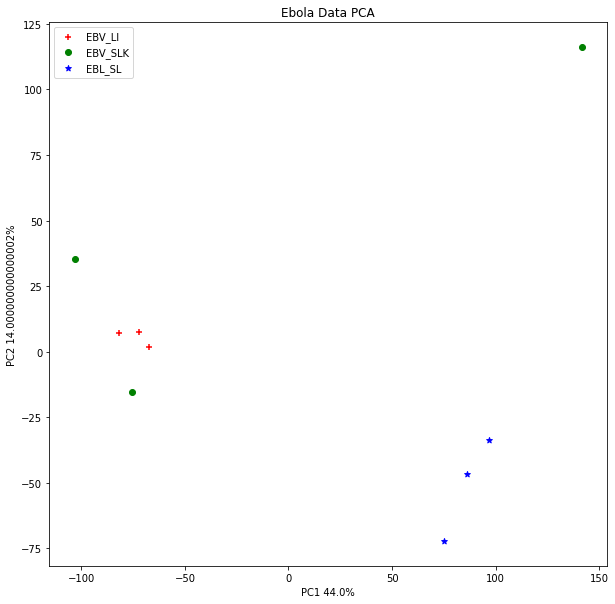

In [ ]:
#@markdown Run Principal Component Analysis
from sklearn.decomposition import PCA 

pca = PCA(n_components=2) 
pca.fit(scaled_data) 
xpca = pca.transform(scaled_data)

PC1 = 0 
PC2 = 1 

plt.figure(figsize=(10, 10))

for i in range(0, xpca.shape[0]): 
  if 'LI' in flabels[i]: 
    c1 = plt.scatter(xpca[i,PC1],xpca[i,PC2], c='r', marker='+') 
  elif 'SLK' in flabels[i]: 
    c2 = plt.scatter(xpca[i,PC1],xpca[i,PC2], c='g', marker='o') 
  elif 'SL' in flabels[i]: 
    c3 = plt.scatter(xpca[i,PC1],xpca[i,PC2], c='b', marker='*') 

#Add labels to PCA scatterplot:
plt.legend([c1, c2, c3],['EBV_LI', 'EBV_SLK', 'EBL_SL']) 
plt.xlabel(f'PC1 {round(pca.explained_variance_ratio_[0],2)*100}%') 
plt.ylabel(f'PC2 {round(pca.explained_variance_ratio_[1],2)*100}%') 
plt.title('Ebola Data PCA')
plt.show() 

# Results
---

# Microbiome
---

The PCA plot for the Ebola data shows the variance of approximately 58% of the data which is lower than would be expected for thorough analysis. The groups shown are the three primary high level sample groups from the data. This different phenotypes separating these genetic sequences are different ebola proteins due to different amino acids across various positions grouped by prevelance in the samples.

In [ ]:
#@markdown Load microbiome data

data = pd.read_table('https://www.dropbox.com/s/vyw4kxp9h7yiwac/Microbiome_example.txt?dl=1', header=None)
data.head

<bound method NDFrame.head of            0      1      2      3      4      5      6
0      BKCM1  BKF01  BKF02  BKF03  BKF13  BKF14  BKF15
1      OTU_1      0    411    406    417     64    463
2      OTU_2    122    470    394    299    232    534
3      OTU_3     33    310    178    384    266    471
4      OTU_4    115    313    389    346    268    460
..       ...    ...    ...    ...    ...    ...    ...
424  OTU_424      0      0      0      0      0      0
425  OTU_425      0      0      0      0      0      0
426  OTU_426      0      0      2      0      0      0
427  OTU_427      0      0      0      0      0      0
428  OTU_428      0      0      0      0      0      0

[429 rows x 7 columns]>

In [ ]:
#@markdown Process data for PCA

#set labels
labels_list = data.loc[[0]] 

#Make a list of sample names
sample_names = data.loc[0] 
sample_names = list(data)[1:] 

#Make unique list of labels
labels = np.unique(labels_list) 

#delete "Group" label 
labels = np.delete(labels, np.where(labels == 'Group')) 

#Remove row "Class" at index 1 and index from data
data = data.drop([0]) 
data = data.transpose() 
data = data.drop([0])

#Get list of all labels
flabels = labels_list.loc[0,:].values[1:] 

#scale data
from sklearn.preprocessing import StandardScaler 
from sklearn import manifold

scaled = StandardScaler() 
scaled.fit(data) 
scaled_data = scaled.transform(data)

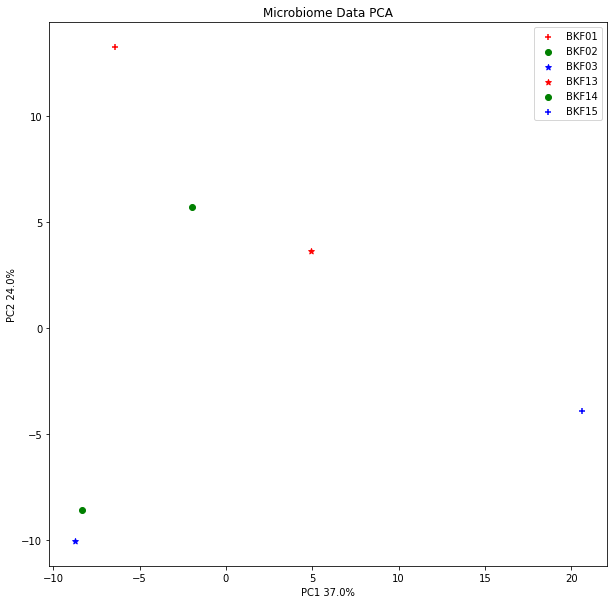

In [ ]:
#@markdown Run Principal Component Analysis
from sklearn.decomposition import PCA 

pca = PCA(n_components=2) 
pca.fit(scaled_data) 
xpca = pca.transform(scaled_data)

PC1 = 0 
PC2 = 1 

plt.figure(figsize=(10, 10))

for i in range(0, xpca.shape[0]): 
  if flabels[i] == 'BKF01': 
    c1 = plt.scatter(xpca[i,PC1],xpca[i,PC2], c='r', marker='+') 
  elif flabels[i] == 'BKF02': 
    c2 = plt.scatter(xpca[i,PC1],xpca[i,PC2], c='g', marker='o') 
  elif flabels[i] == 'BKF03': 
    c3 = plt.scatter(xpca[i,PC1],xpca[i,PC2], c='b', marker='*') 
  elif flabels[i] == 'BKF13':
    c4 = plt.scatter(xpca[i,PC1],xpca[i,PC2], c='r', marker='*')
  elif flabels[i] == 'BKF14': 
    c5 = plt.scatter(xpca[i,PC1],xpca[i,PC2], c='g', marker='o') 
  elif flabels[i] == 'BKF15':
    c6 = plt.scatter(xpca[i,PC1],xpca[i,PC2], c='b', marker='+') 

#Add labels to PCA scatterplot:
plt.legend([c1, c2, c3, c4, c5, c6],['BKF01', 'BKF02', 'BKF03', 'BKF13', 'BKF14', 'BKF15']) 
plt.xlabel(f'PC1 {round(pca.explained_variance_ratio_[0],2)*100}%') 
plt.ylabel(f'PC2 {round(pca.explained_variance_ratio_[1],2)*100}%') 
plt.title('Microbiome Data PCA')
plt.show() 

# Results
---

The PCA plot for the microbiome data shows singular points representing 61% of the variance in the data. This plot is different that of the cancer and Ebola data because these indivdual points representing the 6 samples rather than groupings among the data. The data points show how similiar and dissimliar the various groups are with one another.

# Conclusion
---

The various PCA plots shown demonstrate a range of success in regards to applying dimensionality reduction. None of the above PCA plots met a reasonable threshold of 80% of the variance explained in the two dimensional plots. This variance could be explained further with additional components but this is also dependent on the number of samples analyzed. As the number of features increases, the more noise the data will contian, therefore the more components are necessary to accurately represent the data when dimensionality reduction is applied. This is the curse of dimensionality where there should be more samples than features and the larger the discrepancy, the more complex the interpretation will be. Furthermore, since the microbiome data is primarily integer values, and the cancer data could be rounded to integer values, these samples could be better expressed using an NMDS plot relying on rank orders rather than PCA using Euclidian distances to evaluate the data.